# Computer Vision Tutorial with OpenCV
Based and extended from a DZone Article by Anirudh Rao

https://dzone.com/articles/opencv-python-tutorial-computer-vision-using-openc

The job consisted on the following tasks:
 - Image read, color manipulation and resizing
 - Instantiation of a Cascade Bounding Box classifier (params. in XML)
 - Experimentation with single and multiple face recognition given random pictures
 

In [55]:
import cv2
from matplotlib import pyplot as plt

In [56]:
# Las imagenes por defecto se cargan en BGR
img = cv2.imread('landscape.jpg')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gray_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2GRAY)

In [57]:
print('Dimensiones imagen 1: ', rgb_img.shape)
print('Dimensiones imagen 2: ', gray_img.shape)

Dimensiones imagen 1:  (151, 220, 3)
Dimensiones imagen 2:  (151, 220)


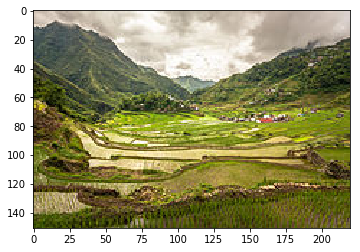

In [58]:
# Muestra imagen a color con PyPlot
plt.imshow(rgb_img)
plt.show()

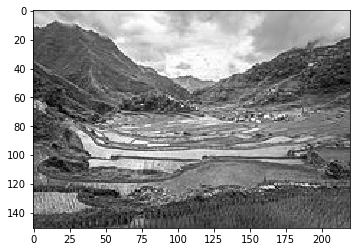

In [59]:
# Muestra imagen en escala de grises
plt.imshow(gray_img, cmap='gray')
plt.show()

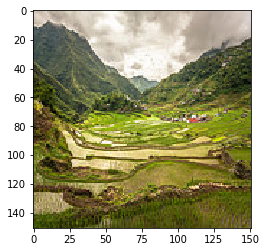

In [60]:
# Paso como parámetro una tupla con las nuevas dimensiones
resized_rgb_img = cv2.resize(rgb_img, (151, 151))

plt.imshow(resized_rgb_img)
plt.show()

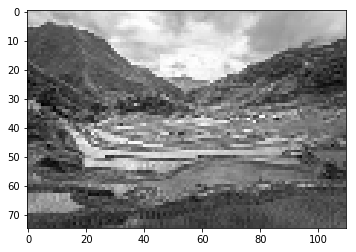

In [61]:
alto = gray_img.shape[0]
ancho = gray_img.shape[1]

# Reduzco el tamaño a la mitad
resized_gray_img = cv2.resize(gray_img, (int(ancho / 2), int(alto / 2)))

plt.imshow(resized_gray_img, cmap='gray')
plt.show()

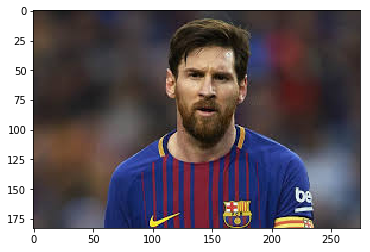

In [62]:
# Creo un clasificador de caras
face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')

messi = cv2.imread('messi.jpeg')
messi = cv2.cvtColor(messi, cv2.COLOR_BGR2RGB)

plt.imshow(messi)
plt.show()

## Bounding Box Incorporation to Original Image

![alt text](boundingbox-incorporation.png)

Bounding boxes:  [[115  31  65  65]]


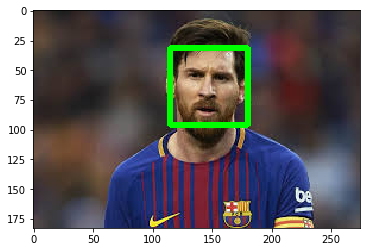

In [63]:
# Detecta elementos en la imagen
faces = face_cascade.detectMultiScale(messi, scaleFactor = 1.05, minNeighbors=5)

# El resultado es un arreglo de bounding boxes (x, y, w, h)
print('Bounding boxes: ', faces)

for x, y, w, h in faces:
    messi_face_detected = cv2.rectangle(messi, (x, y), (x + w, y + h), (0, 255, 0), 3)
    
plt.imshow(messi_face_detected)
plt.show()

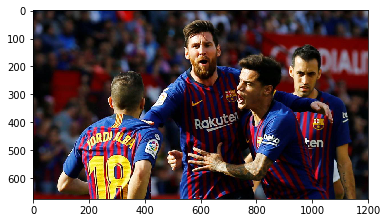

In [64]:
jugadores = cv2.imread('jugadores.jpg')
jugadores = cv2.cvtColor(jugadores, cv2.COLOR_BGR2RGB)

plt.imshow(jugadores)
plt.show()

Cantidad de caras detectadas:  2


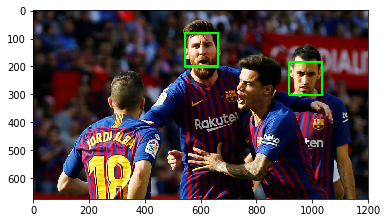

In [66]:
faces_jugadores = face_cascade.detectMultiScale(jugadores, scaleFactor = 1.1, minNeighbors = 5)

for x, y, w, h in faces_jugadores:
    jugadores_face_detected = cv2.rectangle(jugadores, (x, y), (x + w, y + h), (0, 255, 0), 3)
    
print('Cantidad de caras detectadas: ', faces_jugadores.shape[0])
    
# Notar que se emplea el clasificador que detecta las caras frontales, de ahí a que la de Coutinho y Alba no se detectan
plt.imshow(jugadores_face_detected)
plt.show()